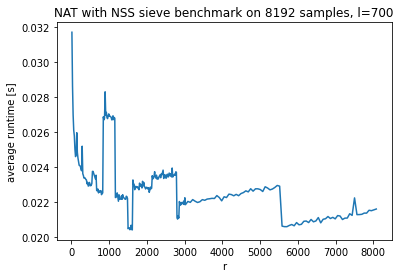

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from mpl_toolkits import mplot3d

stock_files = sorted(glob("../data/nat_benchmark/nss_sieve/2ndrun_r*.csv"))
df = pd.concat((pd.read_csv(file) for file in stock_files), ignore_index = True)

#create vec with truth vars if some condition met
l_small = df[' l'] == 700
df = df[l_small]

df.columns = df.columns.str.strip()

r = df.r
l = df.l
avgruntime = df.avgruntime

# 2d preprocessing
order = np.argsort(r)
rx = np.array(r)[order]
ay = np.array(avgruntime)[order]

#2d
plt.title("NAT with NSS sieve benchmark on 8192 samples, l=700")
plt.xlabel('r')
plt.ylabel('average runtime [s]')
plt.plot(rx, ay)
plt.savefig("../plots/2nd_nat_nss_zoom_l700.jpg")

#3d
#fig = df.plot.scatter(x=0, y=1, c=2, colormap="viridis", sharex=False)
#fig.set_title("Nat with NSS sieve benchmark on 8192 samples")
#fig.figure.savefig("../plots/2nd_nat_nss_zoom.jpg")